# Data Set Creation
# Gabriella Colletti

We assume the data set is structure where the first N rows are class 1, and the next M rows are class 2. 

### Create Binary Column for Binary Classification 

In [1]:
def add_binary_column( N, M, thresh1=0.5, thresh2=0.5):
    '''
    N = number of class 1 occurences
    M = number of class 0 occurences
    '''
    from random import random
    col = []
    A = 1
    B = 0
    for i in range(N):  # Class 1
        num = random()
        if num > thresh1:   # Theshold 1 determines when to add a 0 to the the first N occurences
            col.append(A) 
        else:
            col.append(B) 
    for j in range(M):   #Class 0
        num = random()
        if num>thresh2:    # Theshold 2 determines when to add a 1 to the the last M occurences
            col.append(B)
        else:
            col.append(A)
    return col

### Create Gaussian Columns for Binary Classification 

In [2]:
def add_gauss_column(N, M, mu1, sigma1, mu2, sigma2, show_plot=True):
    from random import gauss
    import random 
    import matplotlib.pyplot as plt 
    #Add N values of distribution with mean = mu1, and stddev=sigma1
    first_N_values= [random.gauss(mu1, sigma1) for i in range(N) ] 
    #Add M values of distribution with mean = mu1, and stddev=sigma1
    last_M_values = [random.gauss(mu2, sigma2) for j in range(M) ] 
    
    # plotting a graph 
    if show_plot:
        plt.title(column_name)
        plt.hist(first_N_values, bins = (N)//10, alpha=0.4) 
        plt.hist(last_M_values, bins = (M)//10, alpha =0.6) 
        plt.show()
        
    rows = []
    rows.extend(first_N_values)
    rows.extend(last_M_values)
    return rows

### Create Skewed Columns for Binary Classification 

In [3]:
def add_skewed_column(data, N, M, column_name, skew1, skew2, show_plot=True):
    # Getting Skewed Data
    from scipy.stats import skewnorm
    N_values = skewnorm.rvs(skew1, size=N)
    M_values = skewnorm.rvs(skew2, size=M)
    rows = []
    rows.extend(N_values)
    rows.extend(M_values)
    
    # Plotting the Data
    if show_plot:
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(1, 1)
        plt.title(column_name)
        ax.hist(N_values, density=True, histtype='stepfilled', alpha=0.2, label = 'Class 1')
        ax.hist(M_values, density=True, histtype='stepfilled', alpha=0.2, label = 'Class 0')
        ax.legend(loc='best', frameon=False)
        plt.show()

    data[column_name]=rows
    return data

### Pipeline

In [4]:
def pipeline(sizes, names, num_binary, num_gauss):
    import pandas as pd
    from random import random
    from random import randint
    sizes = [size//2 for size in sizes]
    new_data = {}
    new_data['Class'] = []
    for name in names:
        new_data[name]=[]
    for size in sizes:
        rows = [1]*size
        rows.extend([0]*size)
        new_data['Class'].extend(rows)
        columns = []
        
        for i in range(num_binary):
            thresh1 = random()
            thresh2 = random()
            new_data[names[i]].extend(add_binary_column( size, size,thresh1, thresh2 ))
        for i in range(num_gauss):   
            mu1, sigma1 = randint(1,100), randint(1,100)
            mu2, sigma2 = randint(1,100), randint(1,100)
            new_data[names[i+num_binary]].extend(add_gauss_column( size,size, mu1, sigma1, mu2, sigma2, False))
    display(pd.DataFrame(new_data))
    return pd.DataFrame(new_data)



# Example

In [5]:
sizes = [1000,2000,2000,2000,2000,1000]
              
columns = ['Is Verified', 'Is Private', 'Is Professional Account','Sex','Is Joined Recently',  
            'Country Block_1', 'Country Block_2',  'Is Business Account', 'Length of Biography', 
            'Mean Post Likes', 'Length of Username','Number of Video Posts']

num_binary = 8
num_gauss = 4
new_cols = pipeline(sizes,columns, num_binary, num_gauss)

,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts
0,1,0,1,1,0,0,0,0,0,4.671132,42.421553,74.810116,39.201004
1,1,0,1,1,0,0,0,0,1,99.878418,31.161919,98.647099,32.637668
2,1,0,1,1,0,0,1,0,0,41.795921,49.143077,16.551772,60.499561
3,1,0,1,1,0,0,0,0,0,62.098541,34.342300,37.530697,63.880090
4,1,0,1,1,0,0,1,1,0,52.304527,21.239728,-2.596604,33.028512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,1,1,1,1,0,0,71.668251,7.884567,9.624348,-73.519535
9996,0,0,1,1,0,1,1,0,1,-53.954474,99.984153,-208.628961,-55.431056
9997,0,0,0,1,1,1,1,1,1,60.639708,57.432767,-151.520803,71.293166
9998,0,1,0,1,1,0,0,0,1,120.177606,44.616405,-1.663003,40.972003


#### Adding Skewed Columns with 2 different Skew distributions for each class

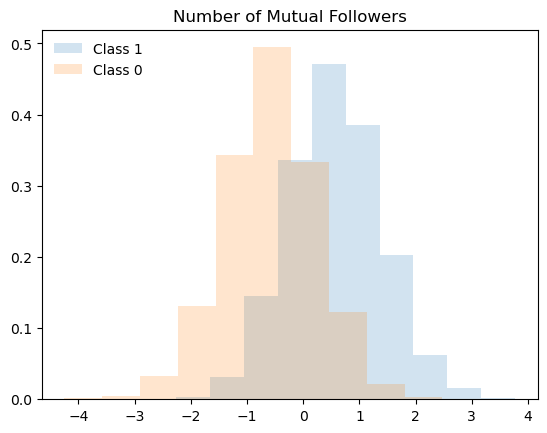

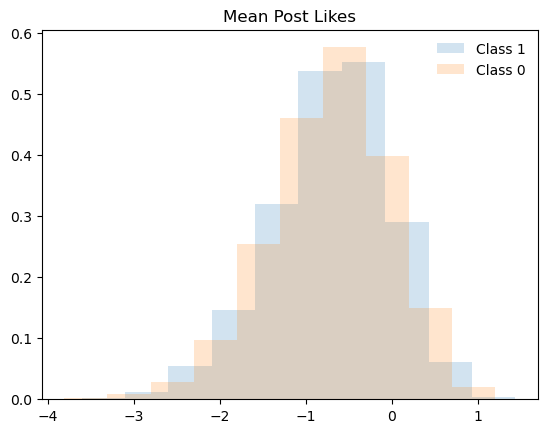

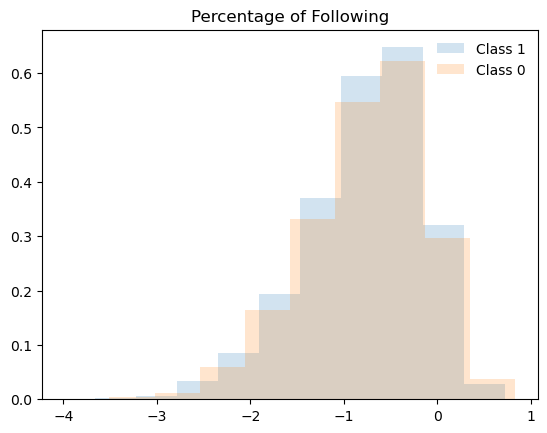

In [6]:
from random import randint
columns = ['Number of Mutual Followers','Mean Post Likes','Percentage of Following']
N = 5000
M = 5000
for column_name in columns:
    skew1,skew2 = randint(-5,5), randint(-5,5)
    add_skewed_column(new_cols, N, M, column_name, skew1, skew2)

In [7]:
import pandas as pd
columns = new_cols.columns.drop('Class')
data = pd.read_csv('data/testing_data.csv')
data = data.drop(columns = columns )
data = data.drop(columns = ['Class'])
new_data = pd.concat([data, new_cols], axis=1)
display(new_data)

,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.307358,0.615318,1,0,1,1,0,0,0,0,0,4.671132,-0.530628,74.810116,39.201004,1.158082,-0.175247
1,0.337280,0.767665,1,0,1,1,0,0,0,0,1,99.878418,-1.882453,98.647099,32.637668,0.776750,-0.132367
2,0.435790,0.672107,1,0,1,1,0,0,1,0,0,41.795921,-1.352060,16.551772,60.499561,-0.239251,-0.850252
3,0.451134,0.559514,1,0,1,1,0,0,0,0,0,62.098541,0.003286,37.530697,63.880090,0.356752,-1.364401
4,0.432907,0.702814,1,0,1,1,0,0,1,1,0,52.304527,-1.042113,-2.596604,33.028512,-0.261755,0.127023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.604297,0.290696,0,0,0,1,1,1,1,0,0,71.668251,-0.593287,9.624348,-73.519535,1.054747,-0.867313
9996,0.464284,0.297403,0,0,1,1,0,1,1,0,1,-53.954474,-0.909044,-208.628961,-55.431056,-0.968296,-0.456515
9997,0.648919,0.473463,0,0,0,1,1,1,1,1,1,60.639708,-1.320149,-151.520803,71.293166,-0.742119,-0.009806
9998,0.620016,0.442845,0,1,0,1,1,0,0,0,1,120.177606,-0.342161,-1.663003,40.972003,-0.458119,0.126241


### Export to CSV

In [8]:
path = 'Drifted Data.csv'
new_data.to_csv(path,index=False)

## Shuffle Distribution Data

#### Gradual Shuffle

In [9]:
# Gradual
from numpy.random import permutation as perm


#[0, 1150, 1151, 3200, 3201, 5250, 5251, 7300, 7301, 9350, 9351, 10000]}
data = pd.read_csv('Drifted Data.csv')
d1 = data.loc[0:1149].copy()
d2 = data.loc[1150:3199].copy()
d3 = data.loc[3200:5249].copy()
d4 = data.loc[5250:7299].copy()
d5 = data.loc[7300:9349].copy()
d6 = data.loc[9350:10000].copy()
display(data)
d1 = d1.reindex(perm(d1.index))
d2 = d2.reindex(perm(d2.index))
d3 = d3.reindex(perm(d3.index))
d4 = d4.reindex(perm(d4.index))
d5 = d5.reindex(perm(d5.index))
d6 = d6.reindex(perm(d6.index))
new_data = pd.concat([d1,d2,d3,d4,d5,d6])
display(new_data)


new_data.to_csv('Gradual Drifted Data.csv', index=False)

,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.307358,0.615318,1,0,1,1,0,0,0,0,0,4.671132,-0.530628,74.810116,39.201004,1.158082,-0.175247
1,0.337280,0.767665,1,0,1,1,0,0,0,0,1,99.878418,-1.882453,98.647099,32.637668,0.776750,-0.132367
2,0.435790,0.672107,1,0,1,1,0,0,1,0,0,41.795921,-1.352060,16.551772,60.499561,-0.239251,-0.850252
3,0.451134,0.559514,1,0,1,1,0,0,0,0,0,62.098541,0.003286,37.530697,63.880090,0.356752,-1.364401
4,0.432907,0.702814,1,0,1,1,0,0,1,1,0,52.304527,-1.042113,-2.596604,33.028512,-0.261755,0.127023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.604297,0.290696,0,0,0,1,1,1,1,0,0,71.668251,-0.593287,9.624348,-73.519535,1.054747,-0.867313
9996,0.464284,0.297403,0,0,1,1,0,1,1,0,1,-53.954474,-0.909044,-208.628961,-55.431056,-0.968296,-0.456515
9997,0.648919,0.473463,0,0,0,1,1,1,1,1,1,60.639708,-1.320149,-151.520803,71.293166,-0.742119,-0.009806
9998,0.620016,0.442845,0,1,0,1,1,0,0,0,1,120.177606,-0.342161,-1.663003,40.972003,-0.458119,0.126241


,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
763,0.259855,0.539888,0,0,1,1,1,1,1,0,0,115.806814,-0.105952,91.185347,37.587173,1.871354,-1.407799
160,0.331524,0.604641,1,0,1,1,0,0,0,0,0,126.337019,-0.535330,35.884035,45.271321,0.936193,-0.267269
112,0.397930,0.616549,1,0,1,1,0,0,0,1,0,78.998246,-0.591269,-19.906375,53.334130,1.185211,-0.423186
505,0.439746,0.820358,0,0,1,0,1,0,1,0,0,110.776545,-0.690903,22.503024,59.117364,1.059474,-0.416724
250,0.412424,0.677935,1,0,1,1,0,0,1,0,1,49.574668,-0.646293,91.302593,55.613507,-0.764930,-0.036236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,0.525984,0.365268,0,1,0,1,0,1,1,1,0,-23.144510,0.415761,-73.993649,20.393950,-0.164623,-0.661479
9607,0.494894,0.457282,0,1,1,1,1,0,0,0,0,-10.334023,0.250411,-119.453590,-16.205897,-0.206245,-0.542275
9551,0.528774,0.469656,0,0,0,1,0,0,1,0,0,23.554178,-1.128924,145.656071,-78.329658,-0.937686,-0.563538
9373,0.601738,0.413600,1,0,0,1,1,1,0,1,0,31.842587,-0.214462,98.209027,75.119871,-2.443446,-2.455493


#### Abrupt Shuffle

In [10]:
# ABRUPT
from numpy.random import permutation as perm

data = pd.read_csv('Drifted Data.csv')
d1 = data.loc[0:1009].copy()
d2 = data.loc[1010:3019].copy()
d3 = data.loc[3020:5039].copy()
d4 = data.loc[5040:7049].copy()
d5 = data.loc[7050:9059].copy()
d6 = data.loc[9060:10000].copy()
display(data)


d1 = d1.reindex(perm(d1.index))
d2 = d2.reindex(perm(d2.index))
d3 = d3.reindex(perm(d3.index))
d4 = d4.reindex(perm(d4.index))
d5 = d5.reindex(perm(d5.index))
d6 = d6.reindex(perm(d6.index))
new_data = pd.concat([d1,d2,d3,d4,d5,d6])
display(new_data)
path = 'Abrupt Drifted Data.csv'
new_data.to_csv(path, index=False)

,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.307358,0.615318,1,0,1,1,0,0,0,0,0,4.671132,-0.530628,74.810116,39.201004,1.158082,-0.175247
1,0.337280,0.767665,1,0,1,1,0,0,0,0,1,99.878418,-1.882453,98.647099,32.637668,0.776750,-0.132367
2,0.435790,0.672107,1,0,1,1,0,0,1,0,0,41.795921,-1.352060,16.551772,60.499561,-0.239251,-0.850252
3,0.451134,0.559514,1,0,1,1,0,0,0,0,0,62.098541,0.003286,37.530697,63.880090,0.356752,-1.364401
4,0.432907,0.702814,1,0,1,1,0,0,1,1,0,52.304527,-1.042113,-2.596604,33.028512,-0.261755,0.127023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.604297,0.290696,0,0,0,1,1,1,1,0,0,71.668251,-0.593287,9.624348,-73.519535,1.054747,-0.867313
9996,0.464284,0.297403,0,0,1,1,0,1,1,0,1,-53.954474,-0.909044,-208.628961,-55.431056,-0.968296,-0.456515
9997,0.648919,0.473463,0,0,0,1,1,1,1,1,1,60.639708,-1.320149,-151.520803,71.293166,-0.742119,-0.009806
9998,0.620016,0.442845,0,1,0,1,1,0,0,0,1,120.177606,-0.342161,-1.663003,40.972003,-0.458119,0.126241


,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
415,0.187069,0.720520,1,0,1,1,0,0,0,0,1,44.070179,-1.124310,-108.282788,48.254425,0.655640,-0.528642
903,0.259900,0.569444,0,0,0,1,1,1,1,0,0,49.607609,0.038236,133.734329,78.585280,1.096249,-1.158969
991,0.303383,0.578409,0,0,1,0,1,1,0,0,0,14.249629,-0.590258,122.264526,68.993985,-0.508188,-2.310692
295,0.383418,0.683965,1,0,1,1,0,0,1,0,1,78.468459,0.436432,-50.626145,33.872760,1.479677,0.215727
447,0.391403,0.640368,1,0,1,1,0,0,0,1,0,124.880964,-1.375119,-144.574043,72.701582,1.522613,-0.320283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,0.486985,0.386346,0,0,0,1,1,1,0,0,0,56.484655,-0.348683,-33.831249,34.968675,-0.471963,-0.443201
9774,0.532474,0.423127,0,1,0,1,1,1,1,0,0,194.181648,-0.141693,27.734727,29.078258,-0.093209,-0.411694
9120,0.466460,0.403543,1,1,0,1,0,1,1,1,0,16.086066,-0.385486,-21.241435,-52.326771,-1.115731,-0.396406
9954,0.659218,0.486988,0,0,1,1,1,1,0,0,0,-45.110005,-1.363287,-5.714810,6.273306,-1.425081,-0.430191


### Shuffle Transition Interval

- (1000, 1020), (3000, 3040), (5000, 5080), (7000, 7100), (9000, 9120)  Abrupt Interval
- (1000, 1300), (3000, 3400), (5000, 5500), (7000, 7600), (9000, 9700) Gradual Intervals

#### Abrupt Shuffle

In [11]:
#Abrupt
from numpy.random import permutation as perm
path = 'Abrupt Drifted Data.csv'
data = pd.read_csv(path)
d1 = data.loc[0:999].copy()
d2 = data.loc[1000:1020].copy()
d3 = data.loc[1021:2999].copy()
d4 = data.loc[3000:3040].copy()
d5 = data.loc[3041:4999].copy()
d6 = data.loc[5000:5080].copy()
d7 = data.loc[5081:6999].copy()
d8 = data.loc[7000:7100].copy()
d9 = data.loc[7101:8999].copy()
d10 = data.loc[9000:9120].copy()
d11 = data.loc[9121:10000].copy()
display(data)
d2 = d2.reindex(perm(d2.index))
d4 = d4.reindex(perm(d4.index))
d6 = d6.reindex(perm(d6.index))
d8 = d8.reindex(perm(d8.index))
d10 = d10.reindex(perm(d10.index))

new_data = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11])
display(new_data)

new_data.to_csv(path, index=False)

,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.187069,0.720520,1,0,1,1,0,0,0,0,1,44.070179,-1.124310,-108.282788,48.254425,0.655640,-0.528642
1,0.259900,0.569444,0,0,0,1,1,1,1,0,0,49.607609,0.038236,133.734329,78.585280,1.096249,-1.158969
2,0.303383,0.578409,0,0,1,0,1,1,0,0,0,14.249629,-0.590258,122.264526,68.993985,-0.508188,-2.310692
3,0.383418,0.683965,1,0,1,1,0,0,1,0,1,78.468459,0.436432,-50.626145,33.872760,1.479677,0.215727
4,0.391403,0.640368,1,0,1,1,0,0,0,1,0,124.880964,-1.375119,-144.574043,72.701582,1.522613,-0.320283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.486985,0.386346,0,0,0,1,1,1,0,0,0,56.484655,-0.348683,-33.831249,34.968675,-0.471963,-0.443201
9996,0.532474,0.423127,0,1,0,1,1,1,1,0,0,194.181648,-0.141693,27.734727,29.078258,-0.093209,-0.411694
9997,0.466460,0.403543,1,1,0,1,0,1,1,1,0,16.086066,-0.385486,-21.241435,-52.326771,-1.115731,-0.396406
9998,0.659218,0.486988,0,0,1,1,1,1,0,0,0,-45.110005,-1.363287,-5.714810,6.273306,-1.425081,-0.430191


,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.187069,0.720520,1,0,1,1,0,0,0,0,1,44.070179,-1.124310,-108.282788,48.254425,0.655640,-0.528642
1,0.259900,0.569444,0,0,0,1,1,1,1,0,0,49.607609,0.038236,133.734329,78.585280,1.096249,-1.158969
2,0.303383,0.578409,0,0,1,0,1,1,0,0,0,14.249629,-0.590258,122.264526,68.993985,-0.508188,-2.310692
3,0.383418,0.683965,1,0,1,1,0,0,1,0,1,78.468459,0.436432,-50.626145,33.872760,1.479677,0.215727
4,0.391403,0.640368,1,0,1,1,0,0,0,1,0,124.880964,-1.375119,-144.574043,72.701582,1.522613,-0.320283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.486985,0.386346,0,0,0,1,1,1,0,0,0,56.484655,-0.348683,-33.831249,34.968675,-0.471963,-0.443201
9996,0.532474,0.423127,0,1,0,1,1,1,1,0,0,194.181648,-0.141693,27.734727,29.078258,-0.093209,-0.411694
9997,0.466460,0.403543,1,1,0,1,0,1,1,1,0,16.086066,-0.385486,-21.241435,-52.326771,-1.115731,-0.396406
9998,0.659218,0.486988,0,0,1,1,1,1,0,0,0,-45.110005,-1.363287,-5.714810,6.273306,-1.425081,-0.430191


#### Gradual Shuffle

In [12]:
from numpy.random import permutation as perm
#(1000, 1300), (3000, 3400), (5000, 5500), (7000, 7600), (9000, 9700)]
path = 'Gradual Drifted Data.csv'
data = pd.read_csv(path)
d1 = data.loc[0:999].copy()
d2 = data.loc[1000:1300].copy()
d3 = data.loc[1301:2999].copy()
d4 = data.loc[3000:3400].copy()
d5 = data.loc[3401:4999].copy()
d6 = data.loc[5000:5500].copy()
d7 = data.loc[5501:6999].copy()
d8 = data.loc[7000:7600].copy()
d9 = data.loc[7601:8999].copy()
d10 = data.loc[9000:9700].copy()
d11 = data.loc[9701:10000].copy()
display(data)
d2 = d2.reindex(perm(d2.index))
d4 = d4.reindex(perm(d4.index))
d6 = d6.reindex(perm(d6.index))
d8 = d8.reindex(perm(d8.index))
d10 = d10.reindex(perm(d10.index))

new_data = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11])
display(new_data)

new_data.to_csv(path, index=False)

,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.259855,0.539888,0,0,1,1,1,1,1,0,0,115.806814,-0.105952,91.185347,37.587173,1.871354,-1.407799
1,0.331524,0.604641,1,0,1,1,0,0,0,0,0,126.337019,-0.535330,35.884035,45.271321,0.936193,-0.267269
2,0.397930,0.616549,1,0,1,1,0,0,0,1,0,78.998246,-0.591269,-19.906375,53.334130,1.185211,-0.423186
3,0.439746,0.820358,0,0,1,0,1,0,1,0,0,110.776545,-0.690903,22.503024,59.117364,1.059474,-0.416724
4,0.412424,0.677935,1,0,1,1,0,0,1,0,1,49.574668,-0.646293,91.302593,55.613507,-0.764930,-0.036236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.525984,0.365268,0,1,0,1,0,1,1,1,0,-23.144510,0.415761,-73.993649,20.393950,-0.164623,-0.661479
9996,0.494894,0.457282,0,1,1,1,1,0,0,0,0,-10.334023,0.250411,-119.453590,-16.205897,-0.206245,-0.542275
9997,0.528774,0.469656,0,0,0,1,0,0,1,0,0,23.554178,-1.128924,145.656071,-78.329658,-0.937686,-0.563538
9998,0.601738,0.413600,1,0,0,1,1,1,0,1,0,31.842587,-0.214462,98.209027,75.119871,-2.443446,-2.455493


,Number of Followers,Number of Posts,Class,Is Verified,Is Private,Is Professional Account,Sex,Is Joined Recently,Country Block_1,Country Block_2,Is Business Account,Length of Biography,Mean Post Likes,Length of Username,Number of Video Posts,Number of Mutual Followers,Percentage of Following
0,0.259855,0.539888,0,0,1,1,1,1,1,0,0,115.806814,-0.105952,91.185347,37.587173,1.871354,-1.407799
1,0.331524,0.604641,1,0,1,1,0,0,0,0,0,126.337019,-0.535330,35.884035,45.271321,0.936193,-0.267269
2,0.397930,0.616549,1,0,1,1,0,0,0,1,0,78.998246,-0.591269,-19.906375,53.334130,1.185211,-0.423186
3,0.439746,0.820358,0,0,1,0,1,0,1,0,0,110.776545,-0.690903,22.503024,59.117364,1.059474,-0.416724
4,0.412424,0.677935,1,0,1,1,0,0,1,0,1,49.574668,-0.646293,91.302593,55.613507,-0.764930,-0.036236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.525984,0.365268,0,1,0,1,0,1,1,1,0,-23.144510,0.415761,-73.993649,20.393950,-0.164623,-0.661479
9996,0.494894,0.457282,0,1,1,1,1,0,0,0,0,-10.334023,0.250411,-119.453590,-16.205897,-0.206245,-0.542275
9997,0.528774,0.469656,0,0,0,1,0,0,1,0,0,23.554178,-1.128924,145.656071,-78.329658,-0.937686,-0.563538
9998,0.601738,0.413600,1,0,0,1,1,1,0,1,0,31.842587,-0.214462,98.209027,75.119871,-2.443446,-2.455493
